### 一.分散性聚类(kmeans)
#### 算法流程:

1.选择聚类的个数k

2.任意产生k个聚类，然后确定聚类中心，或者直接生成k个中心

3.对每个点确定其聚类中心点

4.再计算其聚类新中心

5.重复以上步骤直到满足收敛要求（通常就是确定的中心点不再改变）

 

#### 优点：

1.是解决聚类问题的一种经典算法，简单、快速

2.对处理大数据集，该算法保持可伸缩性和高效率

3.当结果簇是密集的，它的效果较好

#### 缺点：

1.在簇的平均值可被定义的情况下才能使用，可能不适用于某些应用

2.必须事先给出k（要生成的簇的数目），而且对初值敏感，对于不同的初始值，可能会导致不同结果

3.不适合于发现非凸形状的簇或者大小差别很大的簇

4.对躁声和孤立点数据敏感

(150, 4)


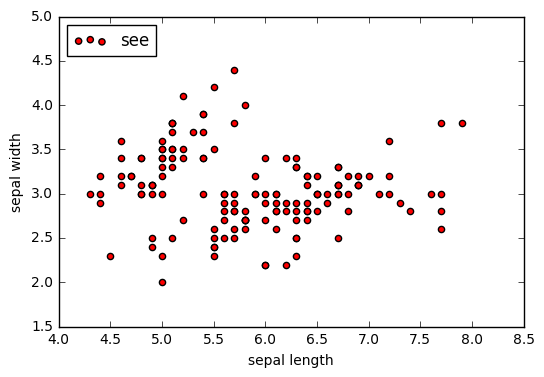

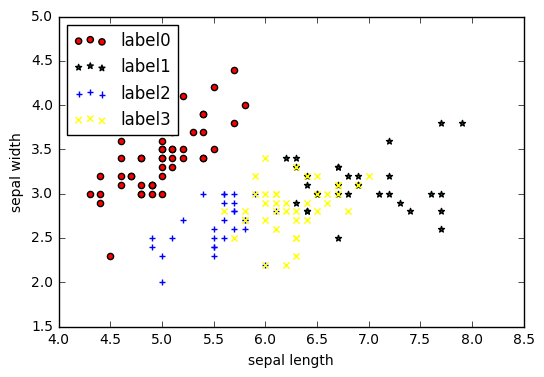

In [5]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # 表示我们取特征空间中的4个维度
print(X.shape)
 
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  
 
estimator = KMeans(n_clusters=4)  # 构造聚类器
estimator.fit(X)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')
plt.scatter(x3[:, 0], x3[:, 1], c="yellow", marker='x', label='label3')
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()

### 二.结构性聚类(层次聚类)
1.凝聚层次聚类：AGNES算法(自底向上)

首先将每个对象作为一个簇，然后合并这些原子簇为越来越大的簇，直到某个终结条件被满足

2.分裂层次聚类：DIANA算法(自顶向下)

首先将所有对象置于一个簇中，然后逐渐细分为越来越小的簇，直到达到了某个终结条件

各个簇的样本数目：
1    50
2    38
0    36
3    26
dtype: int64
聚类结果：
[[ 0 50  0  0]
 [ 1  0 24 25]
 [35  0 14  1]
 [ 0  0  0  0]]


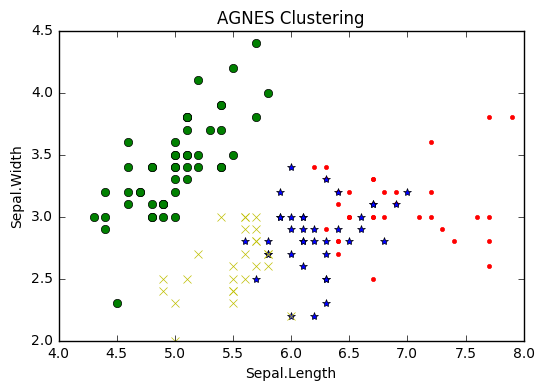

In [15]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
 
iris = datasets.load_iris()
irisdata = iris.data
 
clustering = AgglomerativeClustering(linkage='ward', n_clusters=4)
 
res = clustering.fit(irisdata)
 
print ("各个簇的样本数目：")
print (pd.Series(clustering.labels_).value_counts())
print ("聚类结果：")
print (confusion_matrix(iris.target, clustering.labels_))
 
plt.figure()
d0 = irisdata[clustering.labels_ == 0]
plt.plot(d0[:, 0], d0[:, 1], 'r.')
d1 = irisdata[clustering.labels_ == 1]
plt.plot(d1[:, 0], d1[:, 1], 'go')
d2 = irisdata[clustering.labels_ == 2]
plt.plot(d2[:, 0], d2[:, 1], 'b*')
d3 = irisdata[clustering.labels_ == 3]
plt.plot(d3[:, 0], d3[:, 1], 'yx')
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.title("AGNES Clustering")
plt.show()

### 三.密度聚类之DBSCAN算法
#### 算法:

需要两个参数：ε(eps)和形成高密度区域所需要的最少点数(minPts)

它由一个任意未被访问的点开始，然后探索这个点的ε-邻域，如果ε-邻域里有足够的点，则建立一个新的聚类，否则这个点被标签为杂音。注意这个点之后可能被发现在其它点的ε-邻域里，而该ε-邻域可能有足够的点，届时这个点会被加入该聚类中

(150, 4)


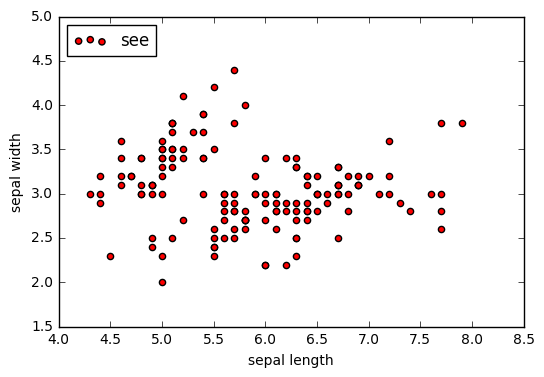

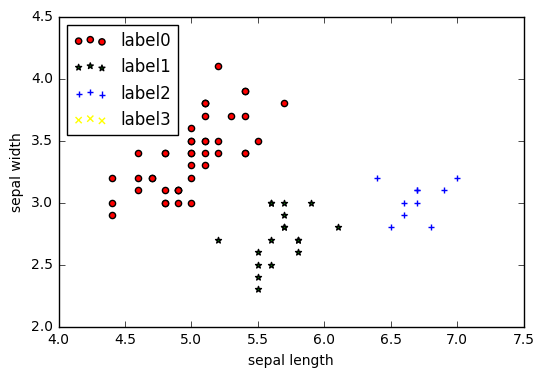

In [19]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 
from  sklearn.cluster import DBSCAN
 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # #表示我们只取特征空间中的4个维度
print(X.shape)#(150, 4)
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  
 
dbscan = DBSCAN(eps=0.4, min_samples=9)
dbscan.fit(X) 
label_pred = dbscan.labels_
 
# 绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')
plt.scatter(x3[:, 0], x3[:, 1], c="yellow", marker='x', label='label3')
plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()